In [1]:
import pandas as pd
from pandas_datareader import data, wb
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

seaborn.set_style('darkgrid')

start = datetime.date(2015, 12, 31)
end = datetime.date.today()

# Check we're still in 2016
if end < datetime.date(2017, 10, 1):
    pass
else:
    end = datetime.date(2016, 12, 31)

In [2]:
t_picks = {'CLG.L':'Clipper Logistics', 'TOT.L': 'Total Produce','HAS.L':'Hays','IHG.L':'Intercontinental Hotels Group',
           'BARC.L': 'Barclays', 'ISAT.L':'Immarsat', 'STAN.L':'Standard Chartered', 'DC.L':'Dixons Carphone',
           'VOD.L':'Vodafone', 'FIF.L':'Finsbury Foods'}
symbols = [key for key in t_picks.keys()]

stock_data = data.DataReader(symbols, 'yahoo', start, end)

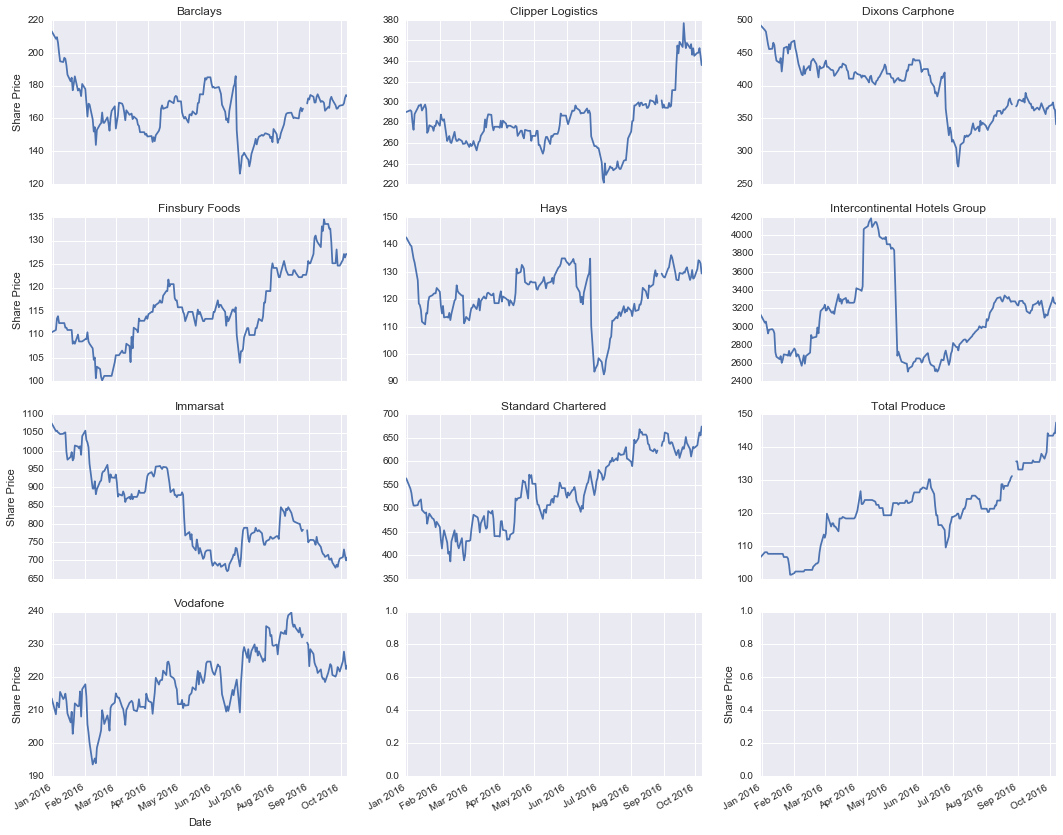

In [3]:
# Plot each stock individually
fig, ax = plt.subplots(4,3,figsize=(18,15), sharex=True)
i = j = 0
for key in stock_data.minor_axis:
    ax[i][j].plot(stock_data.minor_xs(key).index, stock_data.minor_xs(key)['Adj Close'])
    ax[i][j].set_xlabel('Date')
    ax[i][j].set_title(t_picks[key])
    if j == 0:
        ax[i][j].set_ylabel('Share Price')
    # Update i and j
    j += 1
    if j == 3:
        j = 0
        i += 1
# Format Dates for x axis
fig.autofmt_xdate()
plt.ylabel('Share Price')

In [4]:
index = stock_data.major_axis
df = pd.DataFrame(index=index, columns=[t_picks[key] for key in t_picks.keys()])

for key in stock_data.minor_axis:
    start_price = stock_data.minor_xs(key).loc[start,'Adj Close']
    change = stock_data.minor_xs(key)['Adj Close'].apply(lambda x: x / start_price)
    df[t_picks[key]] = change
    

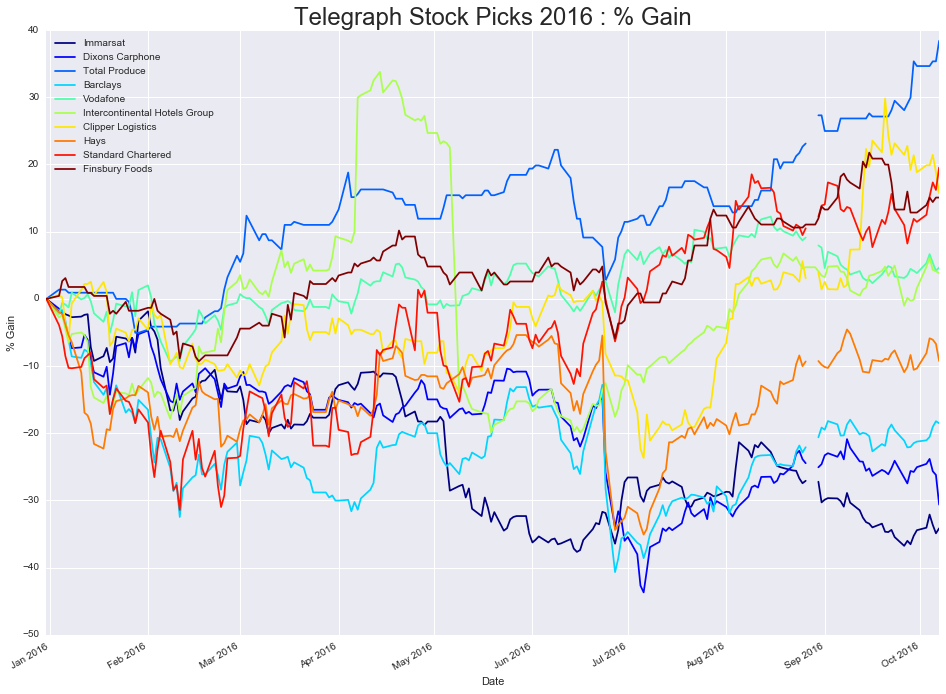

In [5]:
df = df.applymap(lambda x: (x-1) * 100)

ax = df.plot(x = df.index, kind='line', colormap='jet', figsize=(16,12))
ax.set_title('Telegraph Stock Picks 2016 : % Gain', fontsize=24)
ax.set_ylabel('% Gain')

In [6]:
# YTD % Gain
last_date = [df[col].last_valid_index() for col in df.columns]
per_gain = [round(df.loc[last_date[i],df.columns[i]],2) for i in range(len(df.columns))]

df2 = pd.DataFrame({'Company' : df.columns, 'ytd % Gain':per_gain})
df2.sort_values('ytd % Gain',ascending=False,inplace=True)
print(df2)
av_gain = df2['ytd % Gain'].mean(axis=0)
print('\n Average gain: {}%'.format(round(av_gain,2)))

                         Company  ytd % Gain
2                  Total Produce       38.40
8             Standard Chartered       19.55
6              Clipper Logistics       15.75
9                 Finsbury Foods       15.08
4                       Vodafone        4.67
5  Intercontinental Hotels Group        3.84
7                           Hays       -9.25
3                       Barclays      -18.51
1                Dixons Carphone      -30.61
0                       Immarsat      -34.14

 Average gain: 0.48%
